In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

#First, it is needed to set the index which ics the Mouse ID
mouse_drug_data_indexed = mouse_drug_data.set_index("Mouse ID")
clinical_trial_data_indexed=clinical_trial_data.set_index("Mouse ID")

#Merge both dataframes

result = pd.merge(clinical_trial_data,mouse_drug_data, how='left', on='Mouse ID')

# Display the data table for preview
print(result)




     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0        b128          0           45.000000                 0  Capomulin
1        f932          0           45.000000                 0   Ketapril
2        g107          0           45.000000                 0   Ketapril
3        a457          0           45.000000                 0   Ketapril
4        c819          0           45.000000                 0   Ketapril
...       ...        ...                 ...               ...        ...
1901     r944         45           41.581521                 2  Capomulin
1902     u364         45           31.023923                 3  Capomulin
1903     p438         45           61.433892                 1   Ceftamin
1904     x773         45           58.634971                 4    Placebo
1905     b879         45           72.555239                 2   Stelasyn

[1906 rows x 5 columns]


## Tumor Response to Treatment

In [23]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
result_grouped_mean=pd.DataFrame(result.groupby(['Drug','Timepoint']).mean())

#Reset index in order to create
result_grouped_mean.reset_index(inplace=True)

#Select 3 columns
tumor_changes_mean=result_grouped_mean[['Drug','Timepoint','Tumor Volume (mm3)']]

#Set index
tumor_changes_mean_indexed=tumor_changes_mean.set_index("Drug")

#Print
tumor_changes_mean_indexed


,Timepoint,Tumor Volume (mm3)
Drug,,
Capomulin,0,45.000000
Capomulin,5,44.266086
Capomulin,10,43.084291
Capomulin,15,42.064317
Capomulin,20,40.716325
...,...,...
Zoniferol,25,55.432935
Zoniferol,30,57.713531
Zoniferol,35,60.089372


In [14]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint and calculate standard error
result_grouped_se=pd.DataFrame((result.groupby(['Drug','Timepoint']).sem(ddof=1)))

                         
#Reset index in order to create
result_grouped_se.reset_index(inplace=True)

#Select 3 columns
tumor_changes_se=result_grouped_se[['Drug','Timepoint','Tumor Volume (mm3)']]

#Set index
tumor_changes_se_indexed=tumor_changes_se.set_index("Drug")

#Print
tumor_changes_se_indexed


,Timepoint,Tumor Volume (mm3)
Drug,,
Capomulin,0,0.000000
Capomulin,5,0.448593
Capomulin,10,0.702684
Capomulin,15,0.838617
Capomulin,20,0.909731
...,...,...
Zoniferol,25,0.602513
Zoniferol,30,0.800043
Zoniferol,35,0.881426


In [13]:
# Minor Data Munging to Re-Format the Data Frames
tumor_changes_pivot=tumor_changes_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')


# Preview that Reformatting worked
tumor_changes_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


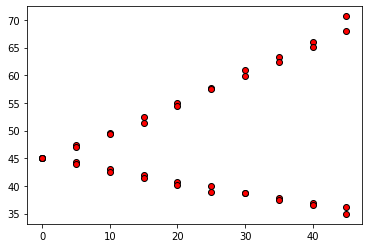

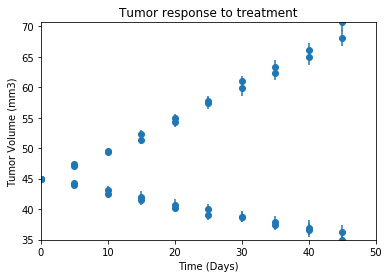

In [49]:
# Generate the Plot (with Error Bars)

plt.scatter(tumor_changes_mean_indexed['Timepoint'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]],
            tumor_changes_mean_indexed['Tumor Volume (mm3)'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]] , 
            marker="o",c="red", edgecolors="black")
fig, ax = plt.subplots()
ax.errorbar(tumor_changes_mean_indexed['Timepoint'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]],tumor_changes_mean_indexed['Tumor Volume (mm3)'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]] ,
            tumor_changes_se_indexed['Tumor Volume (mm3)'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]], fmt="o")
plt.ylim(tumor_changes_mean_indexed['Tumor Volume (mm3)'].min(), tumor_changes_mean_indexed['Tumor Volume (mm3)'].max())
plt.xlim(tumor_changes_mean_indexed['Timepoint'].min(), tumor_changes_mean_indexed['Timepoint'].max()+5)

plt.title("Tumor response to treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()
# Save the Figure



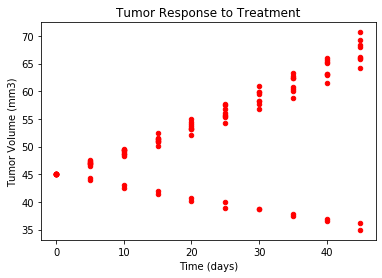

<Figure size 432x288 with 0 Axes>

In [146]:
#result_grouped_mean=result.groupby(['Drug','Timepoint']).mean()

#df=result_grouped_mean.drop(columns='Metastatic Sites')
#df
df_chart=tumor_changes_mean_indexed.plot(kind='scatter',x='Timepoint',y='Tumor Volume (mm3)',color='red')

df_chart.set_xlabel("Time (days)")
df_chart.set_ylabel("Tumor Volume (mm3)")
df_chart.set_title("Tumor Response to Treatment")
#tumor_changes_mean_indexed

plt.show()
plt.tight_layout()
#count_chart = count_makers.plot(kind='bar')
#plt.scatter(tumor_changes_mean_indexed['Timepoint'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]],
#            tumor_changes_mean_indexed['Tumor Volume (mm3)'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]] , 
#            marker="o",c="red", edgecolors="black")

In [138]:
s=tumor_changes_mean['Timepoint'], alpha=0.75

TypeError: cannot unpack non-iterable float object

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [51]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
result_grouped_mean=pd.DataFrame(result.groupby(['Drug','Timepoint']).mean())

# Convert to DataFrame
result_grouped_mean.reset_index(inplace=True)

# Preview DataFrame
metastatic_mean=result_grouped_mean[['Drug','Timepoint','Metastatic Sites']]

#Set index
metastatic_mean_indexed=metastatic_mean.set_index("Drug")

#Print
metastatic_mean_indexed


,Timepoint,Metastatic Sites
Drug,,
Capomulin,0,0.000000
Capomulin,5,0.160000
Capomulin,10,0.320000
Capomulin,15,0.375000
Capomulin,20,0.652174
...,...,...
Zoniferol,25,1.687500
Zoniferol,30,1.933333
Zoniferol,35,2.285714


In [58]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint and caslculate the standard error
result_grouped_se=pd.DataFrame((result.groupby(['Drug','Timepoint']).sem(ddof=1)))

# Convert to DataFrame

#Reset index in order to create
result_grouped_se.reset_index(inplace=True)

# Preview DataFrame  

#Select 3 columns
metastatic_se=result_grouped_se[['Drug','Timepoint','Metastatic Sites']]

#Set index
metastatic_se_indexed=metastatic_se.set_index("Drug")

#Print
metastatic_se_indexed

,Timepoint,Metastatic Sites
Drug,,
Capomulin,0,0.000000
Capomulin,5,0.074833
Capomulin,10,0.125433
Capomulin,15,0.132048
Capomulin,20,0.161621
...,...,...
Zoniferol,25,0.236621
Zoniferol,30,0.248168
Zoniferol,35,0.285714


In [ ]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_pivot=metastatic_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
metastatic_pivot

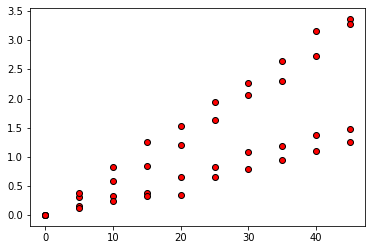

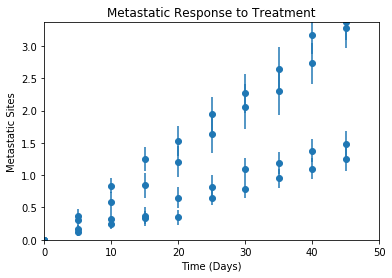

In [56]:
# Generate the Plot (with Error Bars)
plt.scatter(metastatic_mean_indexed['Timepoint'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]],
            metastatic_mean_indexed['Metastatic Sites'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]],
            marker="o", facecolors="red", edgecolors="black")
fig, ax = plt.subplots()
ax.errorbar(metastatic_mean_indexed['Timepoint'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]]
            ,metastatic_mean_indexed['Metastatic Sites'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]],
            metastatic_se_indexed['Metastatic Sites'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]], fmt="o")
plt.ylim(metastatic_mean['Metastatic Sites'].min(), metastatic_mean['Metastatic Sites'].max())
plt.xlim(metastatic_mean['Timepoint'].min(), metastatic_mean['Timepoint'].max()+5)

plt.title("Metastatic Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")

plt.show()
# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [57]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
result_grouped_count=pd.DataFrame(result.groupby(['Drug','Timepoint']).count())

# Convert to DataFrame

#Reset index in order to create
result_grouped_count.reset_index(inplace=True)

# Preview DataFrame

#Select 3 columns
survival_count=result_grouped_count[['Drug','Timepoint','Tumor Volume (mm3)']]

#Set index
survival_count_indexed=survival_count.set_index("Drug")

#Print
survival_count_indexed

,Timepoint,Tumor Volume (mm3)
Drug,,
Capomulin,0,25
Capomulin,5,25
Capomulin,10,25
Capomulin,15,24
Capomulin,20,23
...,...,...
Zoniferol,25,16
Zoniferol,30,15
Zoniferol,35,14


In [59]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint and caslculate the standard error
result_grouped_se=pd.DataFrame((result.groupby(['Drug','Timepoint']).sem(ddof=1)))

# Convert to DataFrame

#Reset index in order to create
result_grouped_se.reset_index(inplace=True)

# Preview DataFrame  

#Select 3 columns
survival_count_se=result_grouped_se[['Drug','Timepoint','Metastatic Sites']]

#Set index
metastatic_se_indexed=metastatic_se.set_index("Drug")

#Print
metastatic_se_indexed

,Timepoint,Metastatic Sites
Drug,,
Capomulin,0,0.000000
Capomulin,5,0.074833
Capomulin,10,0.125433
Capomulin,15,0.132048
Capomulin,20,0.161621
...,...,...
Zoniferol,25,0.236621
Zoniferol,30,0.248168
Zoniferol,35,0.285714


In [79]:
# Minor Data Munging to Re-Format the Data Frames
survival_pivot_count=survival_count.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

survival_pivot_count_two=pd.DataFrame(survival_count.pivot(index='Drug', columns='Timepoint', values='Tumor Volume (mm3)'))
# Preview the Data Frame
survival_pivot_count_two

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug,,,,,,,,,,
Capomulin,25,25,25,24,23,22,22,22,21,21
Ceftamin,25,21,20,19,18,18,16,14,14,13
Infubinol,25,25,21,21,20,18,17,12,10,9
Ketapril,25,23,22,19,19,19,18,17,15,11
Naftisol,25,23,21,21,20,18,15,15,15,13
Placebo,25,24,24,20,19,17,15,14,12,11
Propriva,26,25,23,17,17,14,13,10,9,7
Ramicane,25,25,24,24,23,23,23,21,20,20
Stelasyn,26,25,23,23,21,19,18,16,12,11


In [93]:
#Survival rate
survival_rate=pd.DataFrame(survival_pivot_count_two.iloc[:,[0,-1]])
survival_rate_final=pd.DataFrame(survival_rate.iloc[:,0]-survival_rate.iloc[:,1])

#Print
survival_rate_final


,0
Drug,
Capomulin,4
Ceftamin,12
Infubinol,16
Ketapril,14
Naftisol,12
Placebo,14
Propriva,19
Ramicane,5
Stelasyn,15


In [ ]:
# Generate the Plot (Accounting for percentages)
plt.scatter(survival_count_indexed['Timepoint'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]]
            ,survival_count_indexed['Tumor Volume (mm3)'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]]
            , marker="o", facecolors="red", edgecolors="black")
plt.ylim(survival_count['Tumor Volume (mm3)'].min(), survival_count['Tumor Volume (mm3)'].max())
plt.xlim(survival_count['Timepoint'].min(), survival_count['Timepoint'].max()+5)

plt.title("Survival Rates")
plt.xlabel("Time (Days)")
plt.ylabel("Counts")

plt.show()
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [119]:
#New pivot table
tumor_changes_pivot_two=pd.DataFrame(tumor_changes_mean.pivot(index='Drug', columns='Timepoint', values='Tumor Volume (mm3)'))

# Calculate the percent changes for each drug
drug=pd.DataFrame(tumor_changes_pivot_two.iloc[:,[0,-1]])
drug_final=pd.DataFrame((drug.iloc[:,1]-(drug.iloc[:,0]))/drug.iloc[:,0]*100)

#Print
drug_final

,0
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [133]:
# Store all Relevant Percent Changes into a Tuple
sorted_drug= drug_final.sort_values([0],ascending=False)

tuple = [('Ketapril',sorted_drug.iloc[0,0]), 
        ('Naftisol',sorted_drug.iloc[1,0]), 
        ('Placebo',sorted_drug.iloc[3,0]),
         ('Ramicane',sorted_drug.iloc[-1,0])] 

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure

tuple
# Show the Figure
#fig.show()

[('Ketapril', 57.028794686606076),
 ('Naftisol', 53.92334713476923),
 ('Placebo', 51.29796048315153),
 ('Ramicane', -22.320900462766673)]

![Metastatic Spread During Treatment](../Images/change.png)